# Dataset: *charliehebdo*

- df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df.csv',index=False)
- src_tw_df.to_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-df.csv', encoding = 'utf-8', header = 0)
print(df.columns)
print(df.shape)
df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date',
       'reply_tweet_id', 'reply_user_id', 'reply_tweet', 'reply_date', 'label',
       'cleaned_reply_tw', 'cleaned_src_tw', 'src_sentiment',
       'reply_sentiment', 'emotion'],
      dtype='object')
(36189, 14)


,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label,cleaned_reply_tw,cleaned_src_tw,src_sentiment,reply_sentiment,emotion
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,552785249420447745,18370911,"Now 10 dead in a shooting there today RT ""@BBC...",Wed Jan 07 11:14:08 +0000 2015,0,10 dead shooting today rt bbcdaniels charlie h...,charlie hebdo became well known publishing muh...,Positive,Negative,Happy


In [7]:
src_tw_df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\charliehebdo-src.csv', encoding = 'utf-8', header =0)
print(src_tw_df.columns)
print(src_tw_df.shape)
src_tw_df.head(1)

Index(['src_tweet_id', 'src_user_id', 'src_tweet', 'src_date', 'label',
       'cleaned_src_tw', 'src_sentiment', 'emotion'],
      dtype='object')
(2002, 8)


,src_tweet_id,src_user_id,src_tweet,src_date,label,cleaned_src_tw,src_sentiment,emotion
0,552784600502915072,331658004,Charlie Hebdo became well known for publishing...,Wed Jan 07 11:11:33 +0000 2015,0,charlie hebdo became well known publishing muh...,Positive,Happy


In [70]:
df.isnull().sum()

src_tweet_id        0
src_user_id         0
src_tweet           0
src_date            0
reply_tweet_id      0
reply_user_id       0
reply_tweet         0
reply_date          0
label               0
cleaned_reply_tw    0
cleaned_src_tw      0
src_sentiment       0
reply_sentiment     0
emotion             0
dtype: int64

In [29]:
df.loc[df.cleaned_reply_tw.isnull(),['reply_tweet','cleaned_reply_tw','reply_sentiment']]

,reply_tweet,cleaned_reply_tw,reply_sentiment
47,@GuidoFawkes @R_Christianity_,NaN,Neutral
83,@GuidoFawkes,NaN,Neutral
112,@Observers @SamdeBrito @WilliamMolinie,NaN,Neutral
141,@john_mcguirk @laracchi @Petri2020 @Holopainen...,NaN,Neutral
193,@Klartext89 @AllenStarr1 @MrHarryCole @GazTheJ...,NaN,Neutral
...,...,...,...
36148,@SkyNews @Cosmo_13_,NaN,Neutral
36152,@SkyNews 🙏,NaN,Neutral
36158,@SkyNews 👍🍸,NaN,Neutral
36161,@SkyNews @tomfranks9,NaN,Neutral


- Delete those meaningless responses.

In [31]:
df.dropna(inplace = True)

## Sentiment Analysis

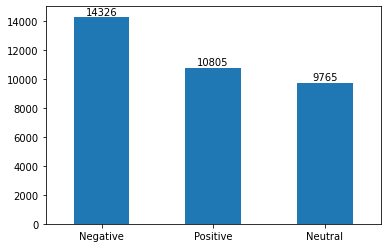

In [36]:
# Reply sentiment analysis
ax = df.reply_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.show()

AttributeError: 'Rectangle' object has no property 'stacked'

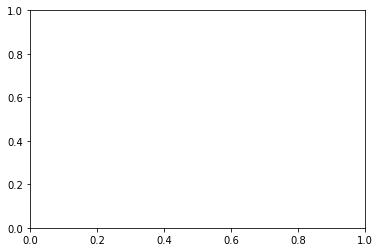

In [69]:
#ax = df.loc[df.reply_sentiment].reply_sentiment.value_counts().plot.bar()
sns.countplot(data= df, x = 'reply_sentiment',hue = 'src_sentiment',stacked=True)
# for i in ax.patches:
#     height = i.get_height()
#     ax.text(
#         i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
#     )
# plt.xticks(rotation=0)
# plt.show()

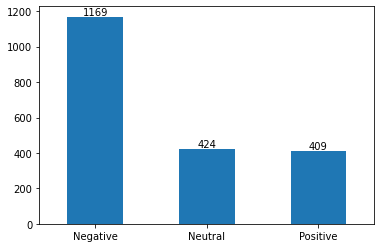

In [38]:
# Souce tweet sentiment analysis
ax = src_tw_df.src_sentiment.value_counts().plot.bar()

for i in ax.patches:
    height = i.get_height()
    ax.text(
        i.get_x() + i.get_width() / 2,height, str(height), ha="center", va="bottom"
    )
plt.xticks(rotation=0)
plt.show()

## Keywords

In [14]:
import nltk
from nltk import FreqDist, word_tokenize

- Reply tweets

In [39]:
text = " ".join(i for i in df['cleaned_reply_tw'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1777983 words in the combination of all review.


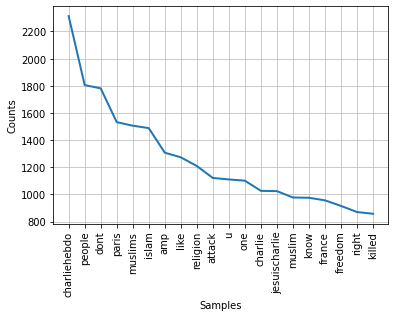

,Word,Frequency
350,charliehebdo,2313
179,people,1805
203,dont,1781
249,paris,1532
95,muslims,1506
101,islam,1488
150,amp,1307
231,like,1273
157,religion,1209
618,attack,1121


In [67]:
text_lst = text.split()
freq = FreqDist(text_lst)
freq.plot(20)
pd.DataFrame(freq.items(),columns = ['Word','Frequency']).sort_values('Frequency',ascending=False)[0:10]

nltk.probability.FreqDist